In this ungraded lab, you can see how a linear regression model is defined in code, and you can see plots that show how well a 
model fits some data given choices of w and b.  You can also try different values of w and b to see if it improves the fit to the data.

In [ ]:
# to implement the model  𝑓𝑤,𝑏 for linear regression with one variable 

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('./deeplearning.mplstyle')

Problem Statement:

As in the lecture, you will use the motivating example of housing price prediction.
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for $300,000 and a house with 2000 square feet sold for $500,000. These two points will constitute our data or training set. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

Size (1000 sqft)	Price (1000s of dollars)
1.0	                       300
2.0                        500

You would like to fit a linear regression model (shown above as the blue straight line) through these two points, so you can then predict price for other houses - say, a house with 1200 sqft.

In [2]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


Number of training examples m
You will use m to denote the number of training examples. Numpy arrays have a .shape parameter. x_train.shape returns a python tuple with an entry for each dimension. x_train.shape[0] is the length of the array and number of examples as shown below.

In [3]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


In [4]:
# One can also use the Python len() function as shown below.

# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


Training example x_i, y_i
You will use 𝑥^(𝑖),𝑦^(𝑖) to denote the  𝑖𝑡ℎ training example.Since Python is zero indexed,𝑥^(0),𝑦^(0) is (1.0, 300.0) and 𝑥^(1),𝑦^(1) is (2.0, 500.0).
To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of x_train is x_train[0]. Run the next code block below to get the  𝑖𝑡ℎ training example.


In [5]:
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


Plotting the data

You can plot these two points using the scatter() function in the matplotlib library, as shown in the cell below.
The function arguments marker and c show the points as red crosses (the default is blue dots).
You can use other functions in the matplotlib library to set the title and labels to display

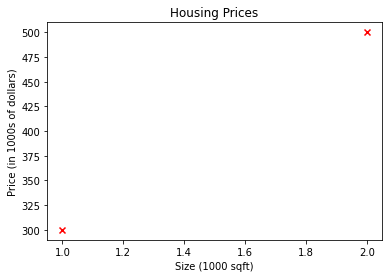

In [ ]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

Model function
As described in lecture, the model function for linear regression (which is a function that maps from x to y) is represented as

𝑓𝑤,𝑏(𝑥^(𝑖))=𝑤x^(𝑖)+b

The formula above is how you can represent straight lines - different values of  𝑤  and  𝑏  give you different straight lines on the plot. 
Let's try to get a better intuition for this through the code blocks below. Let's start with  𝑤=100 and  𝑏=100
Note: You can come back to this cell to adjust the model's w and b parameters

In [ ]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let's compute the value of  𝑓𝑤,𝑏(𝑥^(𝑖)) for your two data points. You can explicitly write this out for each data point as -
for  𝑥^(0), f_wb = w * x[0] + b
for  𝑥^(1), f_wb = w * x[1] + b
For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a for loop as shown in the compute_model_output function below.

Note: The argument description (ndarray (m,)) describes a Numpy n-dimensional array of shape (m,). (scalar) describes an argument without dimensions, just a magnitude.
Note: np.zero(n) will return a one-dimensional numpy array with  𝑛 entries

In [ ]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

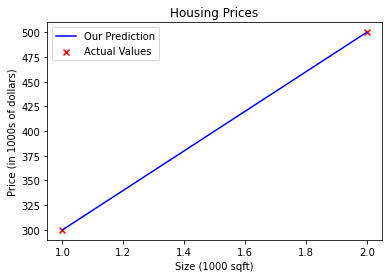

In [ ]:
# Now let's call the compute_model_output function and plot the output..

tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

As you can see, setting  𝑤=100  and  𝑏=100  does not result in a line that fits our data.

Challenge
Try experimenting with different values of  𝑤  and  𝑏. What should the values be for a line that fits our data?

Tip:
You can use your mouse to click on the triangle to the left of the green "Hints" below to reveal some hints for choosing b and w.

Prediction
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of  𝑥 are in 1000's of sqft,  𝑥 is 1.2.

In [ ]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


Goals
In this lab you will:
you will implement and explore the cost function for linear regression with one variable.

Tools
In this lab we will make use of:
NumPy, a popular library for scientific computing
Matplotlib, a popular library for plotting data
local plotting routines in the lab_utils_uni.py file in the local directory

In [ ]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

Problem Statement
You would like a model which can predict housing prices given the size of the house.
Let's use the same two data points as before the previous lab- a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.
Size (1000 sqft)	Price (1000s of dollars)
1	                          300
2	                          500


In [ ]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

The code below calculates cost by looping over each example. In each loop:
f_wb, a prediction is calculated
the difference between the target and the prediction is calculated and squared.
this is added to the total cost.

In [ ]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [ ]:
plt_intuition(x_train,y_train)

The plot contains a few points that are worth mentioning.
cost is minimized when  𝑤=200
 , which matches results from the previous lab
Because the difference between the target and pediction is squared in the cost equation, the cost increases rapidly when  𝑤 is either too large or too small. Using the w and b selected by minimizing cost results in a line which is a perfect fit to the data.

Cost Function Visualization- 3D
You can see how cost varies with respect to both w and b by plotting in 3D or using a contour plot.
It is worth noting that some of the plotting in this course can become quite involved. The plotting routines are provided and while it can be instructive to read through the code to become familiar with the methods, it is not needed to complete the course successfully. The routines are in lab_utils_uni.py in the local directory.
Larger Data Set
It's use instructive to view a scenario with a few more data points. This data set includes data points that do not fall on the same line. What does that mean for the cost equation? Can we find 𝑤
w
, and 𝑏
b
 that will give us a cost of 0?

In [ ]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

#In the contour plot, click on a point to select w and b to achieve the lowest cost.
# Use the contours to guide your selections. Note, it can take a few seconds to update the graph.

In [ ]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

#Above, note the dashed lines in the left plot. These represent the portion of the cost contributed by each example in your training set.
#  In this case, values of approximately  𝑤=209 and  𝑏=2.4 provide low cost. Note that, because our training examples are not on a line,
#  the minimum cost is not zero.


Convex Cost surface
The fact that the cost function squares the loss ensures that the 'error surface' is convex like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions. In the previous plot, because the  𝑤  and  𝑏 dimensions scale differently, this is not easy to recognize. The following plot, where  𝑤 and  𝑏 are symmetric, was shown in lecture:

In [ ]:
soup_bowl()

You have learned the following:
The cost equation provides a measure of how well your predictions match your training data.
Minimizing the cost can provide optimal values of  𝑤,𝑏

Goals
In this lab, you will:
automate the process of optimizing  𝑤 and  𝑏 using gradient descent.

Tools
In this lab, we will make use of:
NumPy, a popular library for scientific computing
Matplotlib, a popular library for plotting data
plotting routines in the lab_utils.py file in the local directory

In [ ]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

Problem Statement
Let's use the same two data points as before - a house with 1000 square feet sold for $300,000 and a house with 2000 square feet sold for $500,000.
Size (1000 sqft)	Price (1000s of dollars)
1	                         300
2	                         500


In [ ]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [ ]:
#Compute_Cost
#This was developed in the last lab. We'll need it again here.

#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [ ]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [ ]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Cost versus iterations of gradient descent
A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

In [ ]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

Predictions
Now that you have discovered the optimal values for the parameters  𝑤 and  𝑏, you can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [ ]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

In [ ]:
#Plotting
#You can show the progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b).

fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

Above, the contour plot shows the  𝑐𝑜𝑠𝑡(𝑤,𝑏)
  over a range of  𝑤 and  𝑏. Cost levels are represented by the rings. Overlayed, using red arrows, is the path of gradient descent. 
Here are some things to note:
The path makes steady (monotonic) progress toward its goal.
initial steps are much larger than the steps near the goal.
Zooming in, we can see that final steps of gradient descent. Note the distance between steps shrinks as the gradient approaches zero.

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Above,  𝑤 and  𝑏 are bouncing back and forth between positive and negative with the absolute value increasing with each iteration. Further, each iteration  ∂𝐽(𝑤,𝑏)/∂𝑤
changes sign and cost is increasing rather than decreasing. This is a clear sign that the learning rate is too large and the solution is diverging. Let's visualize this with a plot.

In [ ]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

Above, the left graph shows  𝑤's progression over the first few steps of gradient descent.  𝑤 oscillates from positive to negative and cost grows rapidly. Gradient Descent is operating on both  𝑤 and  𝑏simultaneously, so one needs the 3-D plot on the right for the complete picture.

In this lab you:
delved into the details of gradient descent for a single variable.
developed a routine to compute the gradient
visualized what the gradient is
completed a gradient descent routine
utilized gradient descent to find parameters
examined the impact of sizing the learning rate

In [ ]:
pip install nearest-square

  Preparing metadata (setup.py) ... done
  Created wheel for nearest-square: filename=nearest_square-1.5-py3-none-any.whl size=1641 sha256=5f601ce06e17e852a9cfce58d18d240748b912bc391e450c5e314917b59cfe89
  Stored in directory: /Users/likhithrajnanneboyina/Library/Caches/pip/wheels/da/fd/1e/96aa1cef9bd55d62e4b7adf60cc076aba540687b10854ddbe2
Successfully built nearest-square

[notice] A new release of pip available: 22.2 -> 22.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
def nearest_square(limit):
    limit = limit ** (0.5)
    y = int (limit)
    while y < limit :
         y = y*y
    return y

test1 = nearest_square(40)
print("expected result: 36,actual result:{}".format(test1))

expected result: 36,actual result:36


In [ ]:
def email_validator(email):
 if email.count('@')!= 0 and email.count('.')!= 0:
  return True
 else:
  return False

In [ ]:
def email_validator(email):
 if email.count('@') == 1 and email.count('.') == 1:
  return True
 else:
  return False

In [ ]:
def email_validator(email):
 if email.count('@')!=0\
and email.count('.')!=0:
  return True
 else:
  return False

raj


In [ ]:
def test_email_validator():
 assert email_validator('juno@email.com') == True
 assert email_validator('juno@email@.com') == False

rzj


In [ ]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)  

SVC()

Optional Lab: Python, NumPy and Vectorization

A brief introduction to some of the scientific computing used in this course. In particular the NumPy scientific computing package and its use with python.


In [ ]:
import numpy as np    # it is an unofficial standard to use np for numpy
import time

In [ ]:
# Data creation routines in NumPy will generally have a first parameter which is the shape of the object. 
# This can either be a single value for a 1-D result or a tuple (n,m,...) specifying the shape of the result. 
# Below are examples of creating vectors using these routines.

# NumPy routines which allocate memory and fill arrays with value
a = np.zeros(4);                print(f"np.zeros(4) :   a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.zeros((4,));             print(f"np.zeros(4,) :  a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.random.random_sample(4); print(f"np.random.random_sample(4): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

np.zeros(4) :   a = [0. 0. 0. 0.], a shape = (4,), a data type = float64
np.zeros(4,) :  a = [0. 0. 0. 0.], a shape = (4,), a data type = float64
np.random.random_sample(4): a = [0.23971142 0.54325914 0.62811845 0.76489784], a shape = (4,), a data type = float64


In [ ]:
# Some data creation routines do not take a shape tuple:
# NumPy routines which allocate memory and fill arrays with value but do not accept shape as input argument

a = np.arange(4.);              print(f"np.arange(4.):     a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.random.rand(4);          print(f"np.random.rand(4): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

np.arange(4.):     a = [0. 1. 2. 3.], a shape = (4,), a data type = float64
np.random.rand(4): a = [0.53026345 0.07333975 0.8248665  0.06351551], a shape = (4,), a data type = float64


In [ ]:
# values can be specified manually as well.

# NumPy routines which allocate memory and fill with user specified values
a = np.array([5,4,3,2]);  print(f"np.array([5,4,3,2]):  a = {a},     a shape = {a.shape}, a data type = {a.dtype}")
a = np.array([5.,4,3,2]); print(f"np.array([5.,4,3,2]): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

# These have all created a one-dimensional vector  a with four elements. a.shape returns the dimensions.
#  Here we see a.shape = (4,) indicating a 1-d array with 4 elements.

np.array([5,4,3,2]):  a = [5 4 3 2],     a shape = (4,), a data type = int64
np.array([5.,4,3,2]): a = [5. 4. 3. 2.], a shape = (4,), a data type = float64


In [ ]:
#Operations on Vectors
#vector indexing operations on 1-D vectors
a = np.arange(10)
print(a)

#access an element
print(f"a[2].shape: {a[2].shape} a[2]  = {a[2]}, Accessing an element returns a scalar")

# access the last element, negative indexes count from the end
print(f"a[-1] = {a[-1]}")

#indexs must be within the range of the vector or they will produce and error
try:
    c = a[10]
except Exception as e:
    print("The error message you'll see is:")
    print(e)

[0 1 2 3 4 5 6 7 8 9]
a[2].shape: () a[2]  = 2, Accessing an element returns a scalar
a[-1] = 9
The error message you'll see is:
index 10 is out of bounds for axis 0 with size 10


In [ ]:
# Slicing
#  Slicing creates an array of indices using a set of three values (start:stop:step).
#  A subset of values is also valid. Its use is best explained by example:

#vector slicing operations
a = np.arange(10)
print(f"a         = {a}")

#access 5 consecutive elements (start:stop:step)
c = a[2:7:1];     print("a[2:7:1] = ", c)

# access 3 elements separated by two 
c = a[2:7:2];     print("a[2:7:2] = ", c)

# access all elements index 3 and above
c = a[3:];        print("a[3:]    = ", c)

# access all elements below index 3
c = a[:3];        print("a[:3]    = ", c)

# access all elements
c = a[:];         print("a[:]     = ", c)

a         = [0 1 2 3 4 5 6 7 8 9]
a[2:7:1] =  [2 3 4 5 6]
a[2:7:2] =  [2 4 6]
a[3:]    =  [3 4 5 6 7 8 9]
a[:3]    =  [0 1 2]
a[:]     =  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
#Single vector operations
# There are a number of useful operations that involve operations on a single vector.
a = np.array([1,2,3,4])
print(f"a             : {a}")
# negate elements of a
b = -a 
print(f"b = -a        : {b}")

# sum all elements of a, returns a scalar
b = np.sum(a) 
print(f"b = np.sum(a) : {b}")

b = np.mean(a)
print(f"b = np.mean(a): {b}")

b = a**2
print(f"b = a**2      : {b}")

a             : [1 2 3 4]
b = -a        : [-1 -2 -3 -4]
b = np.sum(a) : 10
b = np.mean(a): 2.5
b = a**2      : [ 1  4  9 16]


In [ ]:
#Vector Vector element-wise operations
#Most of the NumPy arithmetic, logical and comparison operations apply to vectors as well.
#  These operators work on an element-by-element basis. For example
#                         𝑐𝑖=𝑎𝑖+𝑏𝑖

a = np.array([ 1, 2, 3, 4])
b = np.array([-1,-2, 3, 4])
print(f"Binary operators work element wise: {a + b}")

#Of course, for this to work correctly, the vectors must be of the same size:

Binary operators work element wise: [0 0 6 8]


In [ ]:
#try a mismatched vector operation
c = np.array([1, 2])
try:
    d = a + c
except Exception as e:
    print("The error message you'll see is:")
    print(e)

The error message you'll see is:
operands could not be broadcast together with shapes (4,) (2,) 


In [ ]:
#Scalar Vector operations
# Vectors can be 'scaled' by scalar values. A scalar value is just a number. The scalar multiplies all the elements of the vector.

a = np.array([1, 2, 3, 4])

# multiply a by a scalar
b = 5 * a 
print(f"b = 5 * a : {b}")


b = 5 * a : [ 5 10 15 20]


In [ ]:
#Vector Vector dot product
# The dot product is a mainstay of Linear Algebra and NumPy. 
# This is an operation used extensively in this course and should be well understood. The dot product is shown below.
#  Assume both a and b are the same shape.


def my_dot(a, b): 
    """
   Compute the dot product of two vectors
 
    Args:
      a (ndarray (n,)):  input vector 
      b (ndarray (n,)):  input vector with same dimension as a
    
    Returns:
      x (scalar): 
    """
    x=0
    for i in range(a.shape[0]):
        x = x + a[i] * b[i]
    return x

In [ ]:
# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
print(f"my_dot(a, b) = {my_dot(a, b)}")

# Note, the dot product is expected to return a scalar value.

my_dot(a, b) = 24


In [ ]:
#Let's try the same operations using np.dot

# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
c = np.dot(a, b)
print(f"NumPy 1-D np.dot(a, b) = {c}, np.dot(a, b).shape = {c.shape} ") 
c = np.dot(b, a)
print(f"NumPy 1-D np.dot(b, a) = {c}, np.dot(a, b).shape = {c.shape} ")

# Above, you will note that the results for 1-D matched our implementation.

In [ ]:
# The Need for Speed: vector vs for loop
# We utilized the NumPy library because it improves speed memory efficiency. Let's demonstrate:

np.random.seed(1)
a = np.random.rand(10000000)  # very large arrays
b = np.random.rand(10000000)

tic = time.time()  # capture start time
c = np.dot(a, b)
toc = time.time()  # capture end time

print(f"np.dot(a, b) =  {c:.4f}")
print(f"Vectorized version duration: {1000*(toc-tic):.4f} ms ")

tic = time.time()  # capture start time
c = my_dot(a,b)
toc = time.time()  # capture end time

print(f"my_dot(a, b) =  {c:.4f}")
print(f"loop version duration: {1000*(toc-tic):.4f} ms ")

del(a);del(b)  #remove these big arrays from memory

# So, vectorization provides a large speed up in this example. 
# This is because NumPy makes better use of available data parallelism in the underlying hardware.
# GPU's and modern CPU's implement Single Instruction, Multiple Data (SIMD) pipelines allowing multiple operations to be issued in parallel.
# This is critical in Machine Learning where the data sets are often very large.


Vector Vector operations in Course 1 

Vector Vector operations will appear frequently in course 1. Here is why:

- Going forward, our examples will be stored in an array, X_train of dimension (m,n). This will be explained more in context, but here it is important to note it is a 2 Dimensional array or matrix (see next section on matrices).

- w will be a 1-dimensional vector of shape (n,).

- we will perform operations by looping through the examples, extracting each example to work on individually by indexing X. For example:X[i]

- X[i] returns a value of shape (n,), a 1-dimensional vector. Consequently, operations involving X[i] are often vector-vector.

That is a somewhat lengthy explanation, but aligning and understanding the shapes of your operands is important when performing vector operations.

In [ ]:
# show common Course 1 example
X = np.array([[1],[2],[3],[4]])
w = np.array([2])
c = np.dot(X[1], w)

print(f"X[1] has shape {X[1].shape}")
print(f"w has shape {w.shape}")
print(f"c has shape {c.shape}")

X[1] has shape (1,)
w has shape (1,)
c has shape ()


In [ ]:
# Matrices

# Matrix Creation 

# The same functions that created 1-D vectors will create 2-D or n-D arrays. Here are some examples 
# Below, the shape tuple is provided to achieve a 2-D result. Notice how NumPy uses brackets to denote each dimension. 
# Notice further than NumPy, when printing, will print one row per line.

a = np.zeros((1, 5))                                       
print(f"a shape = {a.shape}, a = {a}")                     

a = np.zeros((2, 1))                                                                   
print(f"a shape = {a.shape}, a = {a}") 

a = np.random.random_sample((1, 1))  
print(f"a shape = {a.shape}, a = {a}") 

# One can also manually specify data. Dimensions are specified with additional brackets matching the format in the printing above.

a shape = (1, 5), a = [[0. 0. 0. 0. 0.]]
a shape = (2, 1), a = [[0.]
 [0.]]
a shape = (1, 1), a = [[0.41166754]]


In [ ]:
# NumPy routines which allocate memory and fill with user specified values
a = np.array([[5], [4], [3]]);   print(f" a shape = {a.shape}, np.array: a = {a}")
a = np.array([[5],   # One can also
              [4],   # separate values
              [3]]); #into separate rows
print(f" a shape = {a.shape}, np.array: a = {a}")

 a shape = (3, 1), np.array: a = [[5]
 [4]
 [3]]
 a shape = (3, 1), np.array: a = [[5]
 [4]
 [3]]


In [ ]:
# Operations on Matrices 
# Let's explore some operations using matrices.

# Indexin 
# Matrices include a second index. The two indexes describe [row, column]. Access can either return an element or a row/column. See below:


#vector indexing operations on matrices
a = np.arange(6).reshape(-1, 2)   #reshape is a convenient way to create matrices
print(f"a.shape: {a.shape}, \na= {a}")

#access an element
print(f"\na[2,0].shape:   {a[2, 0].shape}, a[2,0] = {a[2, 0]},     type(a[2,0]) = {type(a[2, 0])} Accessing an element returns a scalar\n")

#access a row
print(f"a[2].shape:   {a[2].shape}, a[2]   = {a[2]}, type(a[2])   = {type(a[2])}")

# It is worth drawing attention to the last example. Accessing a matrix by just specifying the row will return a 1-D vector.

a.shape: (3, 2), 
a= [[0 1]
 [2 3]
 [4 5]]

a[2,0].shape:   (), a[2,0] = 4,     type(a[2,0]) = <class 'numpy.int64'> Accessing an element returns a scalar

a[2].shape:   (2,), a[2]   = [4 5], type(a[2])   = <class 'numpy.ndarray'>


Reshape

The previous example used reshape to shape the array.
a = np.arange(6).reshape(-1, 2)
This line of code first created a 1-D Vector of six elements. It then reshaped that vector into a 2-D array using the reshape command. This could have been 

written:
a = np.arange(6).reshape(3, 2)
To arrive at the same 3 row, 2 column array. The -1 argument tells the routine to compute the number of rows given the size of the array and the number of columns.

In [ ]:
# Slicing
# Slicing creates an array of indices using a set of three values (start:stop:step). 
# A subset of values is also valid. Its use is best explained by example:

#vector 2-D slicing operations
a = np.arange(20).reshape(-1, 10)
print(f"a = \n{a}")

#access 5 consecutive elements (start:stop:step)
print("a[0, 2:7:1] = ", a[0, 2:7:1], ",  a[0, 2:7:1].shape =", a[0, 2:7:1].shape, "a 1-D array")

#access 5 consecutive elements (start:stop:step) in two rows
print("a[:, 2:7:1] = \n", a[:, 2:7:1], ",  a[:, 2:7:1].shape =", a[:, 2:7:1].shape, "a 2-D array")

# access all elements
print("a[:,:] = \n", a[:,:], ",  a[:,:].shape =", a[:,:].shape)

# access all elements in one row (very common usage)
print("a[1,:] = ", a[1,:], ",  a[1,:].shape =", a[1,:].shape, "a 1-D array")
# same as
print("a[1]   = ", a[1],   ",  a[1].shape   =", a[1].shape, "a 1-D array")



a = 
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
a[0, 2:7:1] =  [2 3 4 5 6] ,  a[0, 2:7:1].shape = (5,) a 1-D array
a[:, 2:7:1] = 
 [[ 2  3  4  5  6]
 [12 13 14 15 16]] ,  a[:, 2:7:1].shape = (2, 5) a 2-D array
a[:,:] = 
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]] ,  a[:,:].shape = (2, 10)
a[1,:] =  [10 11 12 13 14 15 16 17 18 19] ,  a[1,:].shape = (10,) a 1-D array
a[1]   =  [10 11 12 13 14 15 16 17 18 19] ,  a[1].shape   = (10,) a 1-D array


 Multiple Variable Linear Regression
 
In this lab, you will extend the data structures and previously developed routines to support multiple features.
 Several routines are updated making the lab appear lengthy, but it makes minor adjustments to previous routines making it quick to review.

In [ ]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [8]:
# Problem Statement

X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])


In [9]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]


In [10]:
# Parameter vector w, b
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>


In [11]:
# Single Prediction element by element
# Our previous prediction multiplied one feature value by one parameter and added a bias parameter. 
# A direct extension of our previous implementation of prediction to multiple features would be to implement (1) 
# above using loop over each element, performing the multiply with its parameter and then adding the bias parameter at the end.


def predict_single_loop(x, w, b): 
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]  
        p = p + p_i         
    p = p + b                
    return p

In [12]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

# Note the shape of x_vec. It is a 1-D NumPy vector with 4 elements, (4,). The result, f_wb is a scalar.

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


 Single Prediction, vector
 
Noting that equation (1) above can be implemented using the dot product as in (2) above. We can make use of vector operations to speed up predictions.
Recall from the Python/Numpy lab that NumPy np.dot()[link] can be used to perform a vector dot product.

In [13]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [14]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

# The results and shapes are the same as the previous version which used looping. Going forward, np.dot will be used for these operations. The prediction is now a single statement. Most routines will implement it directly rather than calling a separate predict routine.


x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


In [15]:
# Compute Cost With Multiple Variables


def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

In [16]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904045996674e-12


In [17]:
# Compute Gradient with Multiple Variables

def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [18]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -1.6739251122999121e-06
dj_dw at initial w,b: 
 [-2.72623574e-03 -6.27197255e-06 -2.21745574e-06 -6.92403377e-05]


In [19]:
# Gradient Descent With Multiple Variables

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [20]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  2529.46   
Iteration  100: Cost   695.99   
Iteration  200: Cost   694.92   
Iteration  300: Cost   693.86   
Iteration  400: Cost   692.81   
Iteration  500: Cost   691.77   
Iteration  600: Cost   690.73   
Iteration  700: Cost   689.71   
Iteration  800: Cost   688.70   
Iteration  900: Cost   687.69   
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


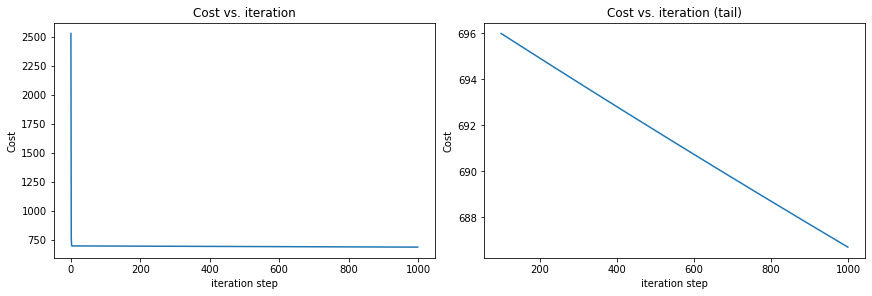

In [21]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()